In [39]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
csv_link="../dataset/sample.csv"

In [41]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dataframe=scaler.fit_transform(dataframe)
dataframe = pd.DataFrame(dataframe, columns = ['r1','g1','b1','r2','g2','b2','r3','g3','b3','r4','g4','b4'])

In [43]:
dataframe.head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,0.937255,0.486275,0.556863,0.980392,0.909804,0.878431,0.713725,0.886275,0.827451,0.847059,0.654902,0.694118
1,0.909804,0.705882,0.721569,0.933333,0.839216,0.827451,0.643137,0.576471,0.576471,0.403922,0.349020,0.368627
2,0.984314,0.905882,0.776471,0.705882,0.972549,0.784314,0.627451,0.905882,0.898039,1.000000,0.682353,0.737255
3,0.019608,0.266667,0.368627,0.094118,0.603922,0.705882,0.458824,0.901961,0.854902,0.831373,0.945098,0.956863
4,0.905882,0.823529,0.800000,0.725490,0.717647,0.741176,0.525490,0.545098,0.556863,0.933333,0.929412,0.905882


In [44]:
input_sequence = dataframe.copy()
target_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r2','g2','b2','r3','g3','b3','r4','g4','b4']]).T


In [45]:
target_sequence

,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,0.980392,0.909804,0.878431,0.713725,0.886275,0.827451,0.847059,0.654902,0.694118
1,0.933333,0.839216,0.827451,0.643137,0.576471,0.576471,0.403922,0.349020,0.368627
2,0.705882,0.972549,0.784314,0.627451,0.905882,0.898039,1.000000,0.682353,0.737255
3,0.094118,0.603922,0.705882,0.458824,0.901961,0.854902,0.831373,0.945098,0.956863
4,0.725490,0.717647,0.741176,0.525490,0.545098,0.556863,0.933333,0.929412,0.905882
...,...,...,...,...,...,...,...,...,...
1995,0.901961,0.870588,0.827451,0.200000,0.529412,0.364706,0.854902,0.400000,0.313725
1996,0.921569,0.317647,0.368627,0.827451,0.752941,0.698039,0.043137,0.035294,0.035294
1997,0.184314,0.850980,0.937255,0.019608,0.701961,0.921569,0.917647,0.917647,0.901961
1998,0.000000,0.450980,0.360784,0.968627,0.529412,0.172549,0.709804,0.694118,0.674510


In [46]:
X = np.reshape(input_sequence, (-1,3))
y = np.reshape(target_sequence, (-1,9))


In [47]:
X


array([[0.9372549 , 0.48627451, 0.55686275],
       [0.90980392, 0.70588235, 0.72156863],
       [0.98431373, 0.90588235, 0.77647059],
       ...,
       [0.27058824, 0.38039216, 0.46666667],
       [0.1372549 , 0.10196078, 0.10196078],
       [0.28235294, 0.50196078, 0.46666667]])

In [48]:
y

array([[0.98039216, 0.90980392, 0.87843137, ..., 0.84705882, 0.65490196,
        0.69411765],
       [0.93333333, 0.83921569, 0.82745098, ..., 0.40392157, 0.34901961,
        0.36862745],
       [0.70588235, 0.97254902, 0.78431373, ..., 1.        , 0.68235294,
        0.7372549 ],
       ...,
       [0.18431373, 0.85098039, 0.9372549 , ..., 0.91764706, 0.91764706,
        0.90196078],
       [0.        , 0.45098039, 0.36078431, ..., 0.70980392, 0.69411765,
        0.6745098 ],
       [0.95294118, 0.08627451, 0.11764706, ..., 0.01568627, 0.21960784,
        0.30588235]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [50]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(9, input_shape=(3,),activation='relu'),
   
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(2048, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(target_sequence.shape[1])  
  ])

In [51]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])



In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 9)                 36        
                                                                 
 dense_27 (Dense)            (None, 32)                320       
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dense_29 (Dense)            (None, 128)               8320      
                                                                 
 dense_30 (Dense)            (None, 256)               33024     
                                                                 
 dense_31 (Dense)            (None, 512)               131584    
                                                                 
 dense_32 (Dense)            (None, 1024)             

In [53]:
# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=10,
                    verbose=1,validation_data=(X_test,y_test))



Epoch 1/100
134/134 [==============================] - 8s 44ms/step - loss: 0.1164 - accuracy: 0.2291 - val_loss: 0.0875 - val_accuracy: 0.2439
Epoch 2/100
134/134 [==============================] - 6s 42ms/step - loss: 0.0899 - accuracy: 0.2507 - val_loss: 0.0877 - val_accuracy: 0.2182
Epoch 3/100
134/134 [==============================] - 6s 46ms/step - loss: 0.0893 - accuracy: 0.2254 - val_loss: 0.0873 - val_accuracy: 0.2182
Epoch 4/100
134/134 [==============================] - 6s 45ms/step - loss: 0.0895 - accuracy: 0.2299 - val_loss: 0.0879 - val_accuracy: 0.2439
Epoch 5/100
134/134 [==============================] - 6s 45ms/step - loss: 0.0892 - accuracy: 0.2284 - val_loss: 0.0894 - val_accuracy: 0.2439
Epoch 6/100
134/134 [==============================] - 6s 45ms/step - loss: 0.0888 - accuracy: 0.2187 - val_loss: 0.0863 - val_accuracy: 0.2424
Epoch 7/100
134/134 [==============================] - 6s 44ms/step - loss: 0.0895 - accuracy: 0.2425 - val_loss: 0.0874 - val_accuracy:

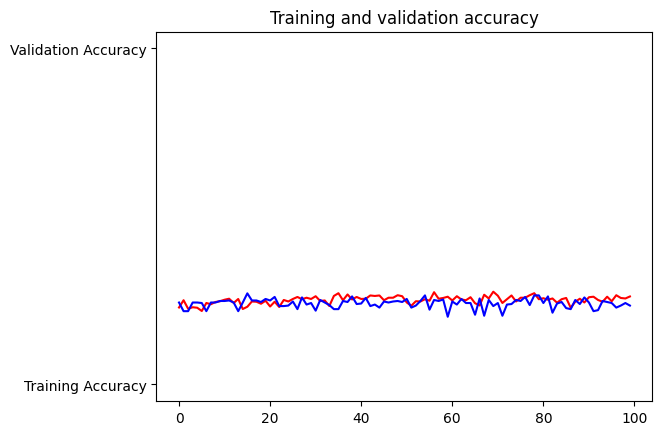

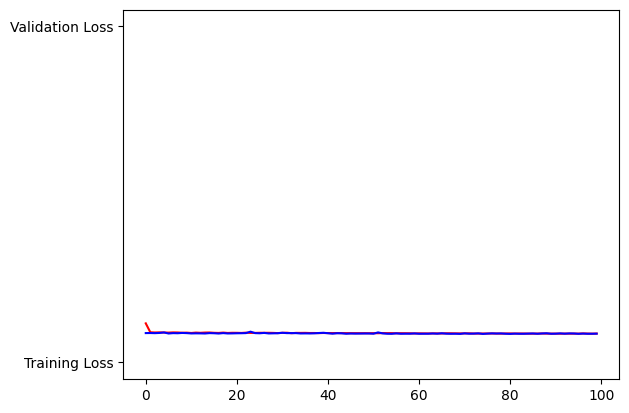

In [54]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [55]:
dara=[[255,158,114]]

test_input = np.array(dara)
scaled_input=scaler.fit_transform(dara)
predictions = model.predict(scaled_input)
predictions= predictions*255
# Print the predictions
print(predictions)

1/1 [==============================] - 0s 96ms/step
[[139.56244  124.957375 121.056725 147.21075  144.08635  136.55804
  157.38434  145.83801  136.23979 ]]


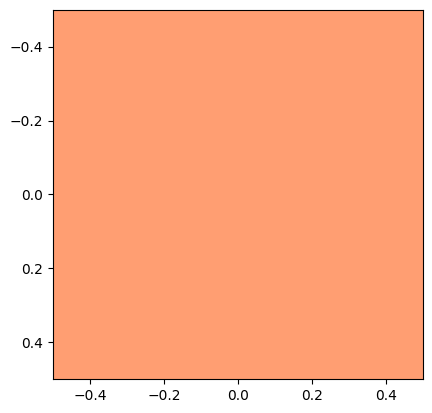

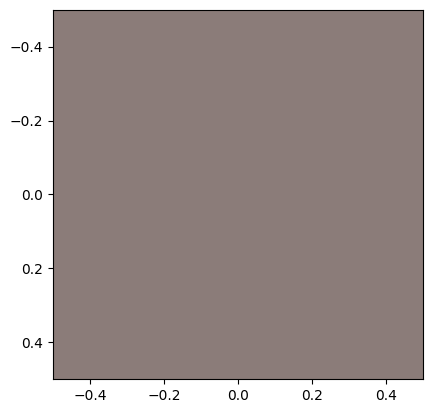

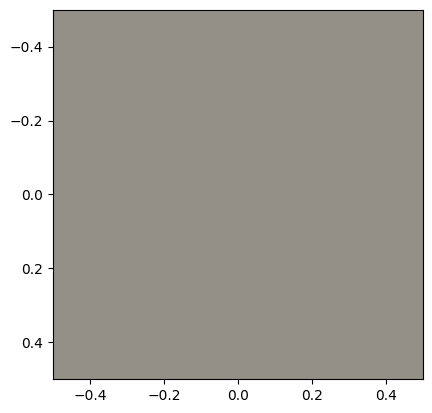

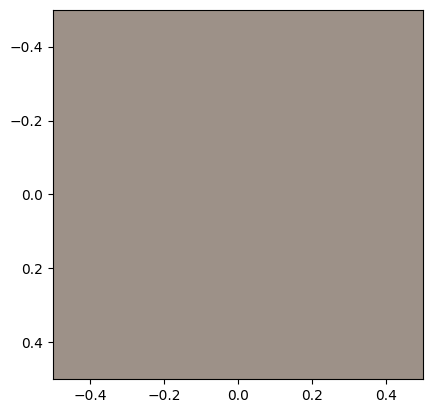

In [56]:
plt.imshow([[[x / 255 for x in test_input[0]]]])
plt.show()

plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
plt.show()